# Instructions

This notebook is useful for exploring your dataset and producing some high level statistics and charts based on dataset metadata.

It assumes your dataset is stored as frame images in video subfolders in `data/` e.g. `data/video_1/frame00001.jpg`

You can use `notebooks/helper_extract_frames.ipynb` to extract frames at a desired FPS from video files.

This notebook also assumes you have a 1:1 mapping between frames and rows in your labels file which should be placed in `data/labels.csv`

# Setup

In [1]:
import os
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
%matplotlib inline

import cv2
from time import time as timer
import sys
sys.path.append('..')

In [2]:
# setup paths
pwd = os.getcwd().replace("notebooks","")
path_cache = pwd + 'cache/'
path_data = pwd + 'data_penguins/'

In [3]:
# read vid paths
path_videos = []
for filename in os.listdir(path_data):
    if os.path.isdir(os.path.join(path_data, filename)):
        path_videos.append(filename)

path_videos = [path_data + v + '/' for v in path_videos if v != '.DS_Store']

# Visualize some of the data

In [4]:
labels = pd.read_csv(path_data + 'labels.csv')
labels[labels['split'] == 'valid']['video'].unique()
df = labels.groupby(['video']).agg(len)
df = pd.DataFrame(df['frame'])
df['video'] = df.index
dft = pd.merge(df,labels,left_on='video',right_on='video', how='left')
df = dft[['frame_x', 'video', 'split']]
df.columns = ['count','video','split']
df.sort_values('video', inplace=True)

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:3265: FutureWarning: 'video' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [5]:
df.head()

count            video split
0      3139  20150807_no8B_1  test
2088   3139  20150807_no8B_1  test
2089   3139  20150807_no8B_1  test
2090   3139  20150807_no8B_1  test
2091   3139  20150807_no8B_1  test

In [6]:
df.drop_duplicates(inplace=True)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


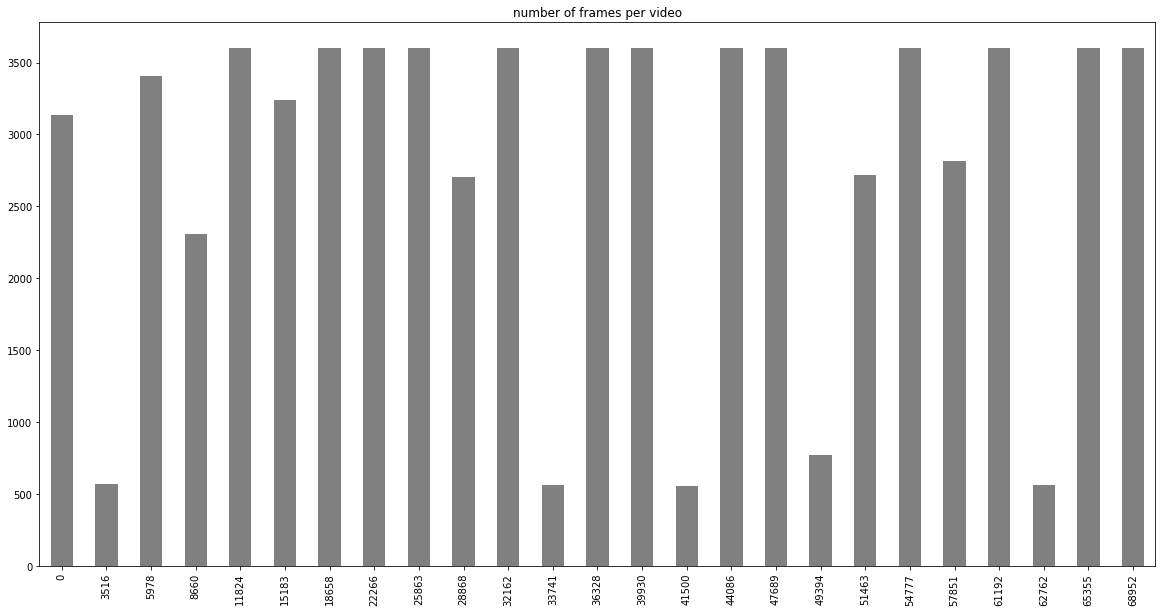

In [8]:
df['count'].plot(kind='bar', figsize = (20,10), color = 'gray', title = 'number of frames per video')
plt.show()

In [19]:
df.head()

count            video  split color
0       3139  20150807_no8B_1   test   red
3516     570  20150820_no8B_2  train  blue
5978    3407  20150820_no8B_3  train  blue
8660    2306  20150820_no9W_3  train  blue
11824   3600  20150827_no8B_1  train  blue

In [17]:
def get_color(split):
    if split == "test":
        return "red"
    elif split == "train":
        return "blue"
    else:
        return "orange"

In [18]:
df['color'] = df['split'].apply(lambda x: get_color(x))

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [27]:
df.head()

count            video  split color
0       3139  20150807_no8B_1   test   red
3516     570  20150820_no8B_2  train  blue
5978    3407  20150820_no8B_3  train  blue
8660    2306  20150820_no9W_3  train  blue
11824   3600  20150827_no8B_1  train  blue

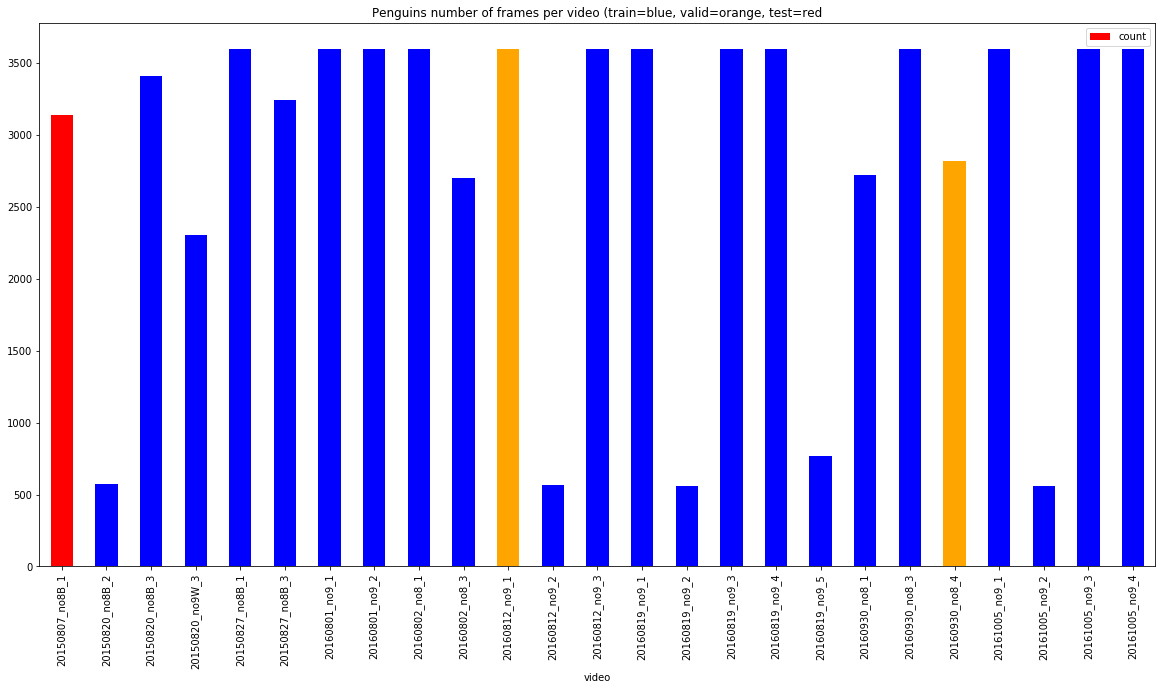

In [30]:
df.plot(x='video', y = 'count', kind='bar', figsize = (20,10), color = df['color'], title = 'Penguins number of frames per video (train=blue, valid=orange, test=red')
plt.show()

# check label distribution in test vid compared to a training vid

In [40]:
labels.head()

video                       frame    label split
0  20150807_no8B_1  20150807_no8B_1_000000.jpg  shallow  test
1  20150807_no8B_1  20150807_no8B_1_000001.jpg  shallow  test
2  20150807_no8B_1  20150807_no8B_1_000002.jpg  shallow  test
3  20150807_no8B_1  20150807_no8B_1_000003.jpg  shallow  test
4  20150807_no8B_1  20150807_no8B_1_000004.jpg  shallow  test

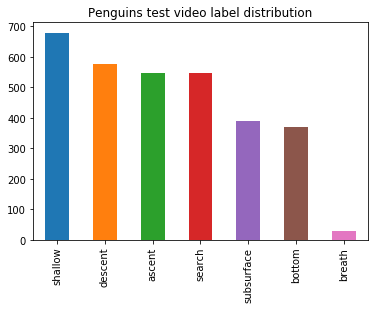

In [41]:
labels[labels['video'] == "20150807_no8B_1"].label.value_counts().plot(kind='bar', title = 'Penguins test video label distribution')

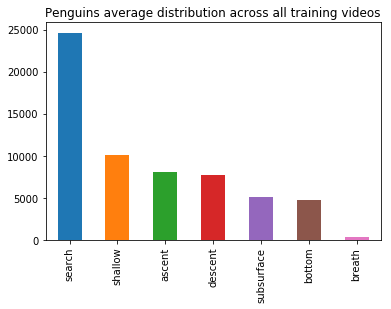

In [45]:
labels[labels['split'] == "train"].label.value_counts().plot(kind='bar', title = 'Penguins average distribution across all training videos')

> pick new test and valid vids by inspecting distributions

## TEST

In [55]:
labels['video'].unique()

array(['20150807_no8B_1', '20150820_no8B_2', '20150820_no8B_3',
       '20150820_no9W_3', '20150827_no8B_1', '20150827_no8B_3',
       '20160801_no9_1', '20160801_no9_2', '20160802_no8_1',
       '20160802_no8_3', '20160812_no9_1', '20160812_no9_2',
       '20160812_no9_3', '20160819_no9_1', '20160819_no9_2',
       '20160819_no9_3', '20160819_no9_4', '20160819_no9_5',
       '20160930_no8_1', '20160930_no8_3', '20160930_no8_4',
       '20161005_no9_1', '20161005_no9_2', '20161005_no9_3',
       '20161005_no9_4'], dtype=object)

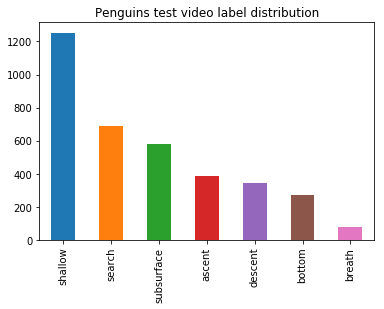

In [61]:
labels[labels['video'] == "20160819_no9_3"].label.value_counts().plot(kind='bar', title = 'Penguins test video label distribution')

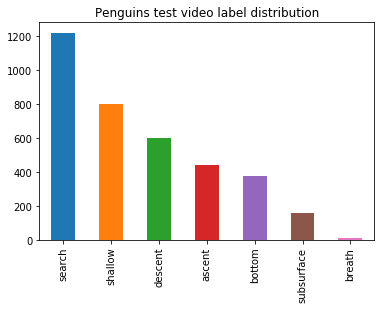

In [62]:
labels[labels['video'] == "20150827_no8B_1"].label.value_counts().plot(kind='bar', title = 'Penguins test video label distribution')

> new test vids: 20160819_no9_3, 20150827_no8B_1

## validation

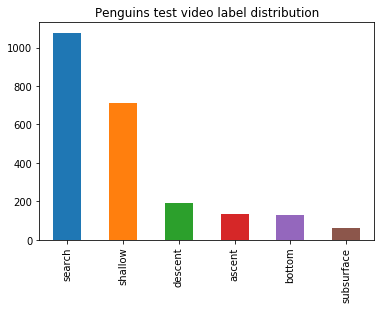

In [63]:
labels[labels['video'] == "20150820_no9W_3"].label.value_counts().plot(kind='bar', title = 'Penguins test video label distribution')

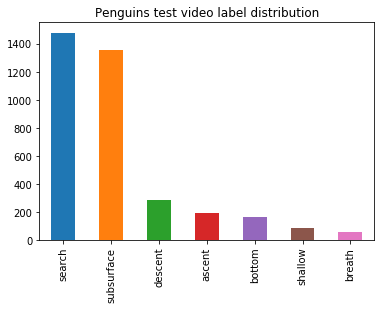

In [64]:
labels[labels['video'] == "20160812_no9_1"].label.value_counts().plot(kind='bar', title = 'Penguins test video label distribution')

In [ ]:
labels[labels['video'] == "20160930_no8_4"].label.value_counts().plot(kind='bar', title = 'Penguins test video label distribution')

In [ ]:
'20150820_no9W_3', '20160812_no9_1', "20160930_no8_4"

In [47]:
list(labels['video'].unique())

['20150807_no8B_1',
 '20150820_no8B_2',
 '20150820_no8B_3',
 '20150820_no9W_3',
 '20150827_no8B_1',
 '20150827_no8B_3',
 '20160801_no9_1',
 '20160801_no9_2',
 '20160802_no8_1',
 '20160802_no8_3',
 '20160812_no9_1',
 '20160812_no9_2',
 '20160812_no9_3',
 '20160819_no9_1',
 '20160819_no9_2',
 '20160819_no9_3',
 '20160819_no9_4',
 '20160819_no9_5',
 '20160930_no8_1',
 '20160930_no8_3',
 '20160930_no8_4',
 '20161005_no9_1',
 '20161005_no9_2',
 '20161005_no9_3',
 '20161005_no9_4']

# view some frames

In [23]:
from PIL import Image

In [24]:
def view_video_sample(vid):
    paths = list(labels[labels['video'] == vid]['frame'])
    paths = [path_data + vid + '/' + p for p in paths]

    # plot first
    img = Image.open(paths[0])
    plt.imshow(img)
    plt.show()

    # plot last
    img = Image.open(paths[len(paths)-1])
    plt.imshow(img)
    plt.show()

20150807_no8B_1 test


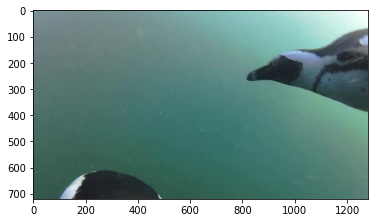

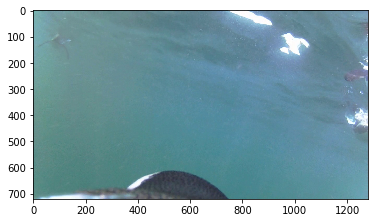

20160819_no9_4 train


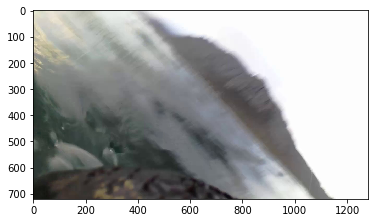

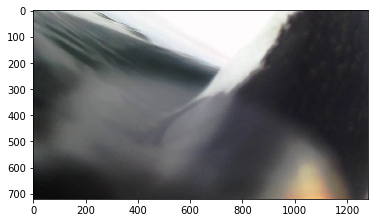

20160819_no9_3 train


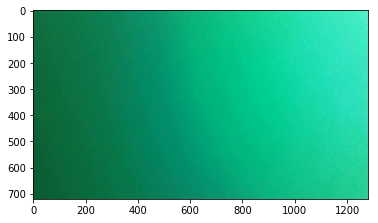

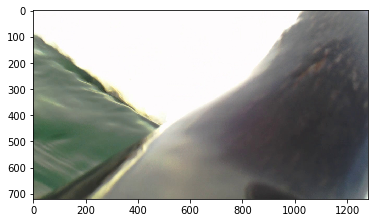

20160930_no8_1 train


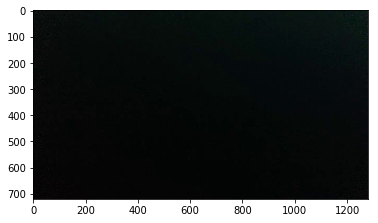

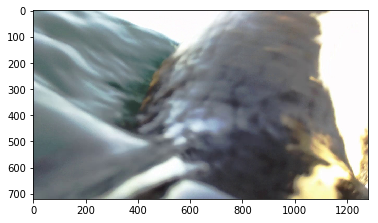

20160819_no9_5 train


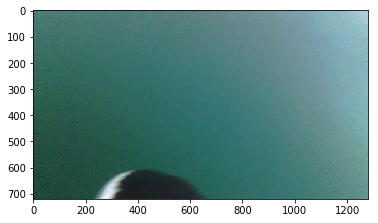

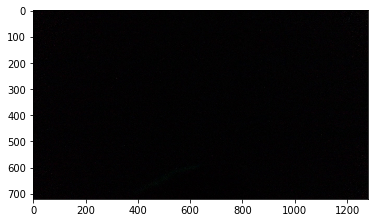

20160819_no9_1 train


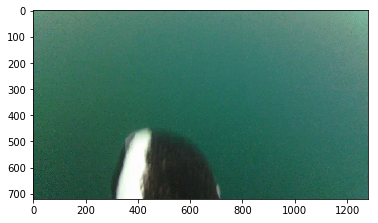

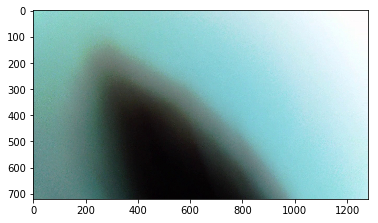

20160812_no9_3 train


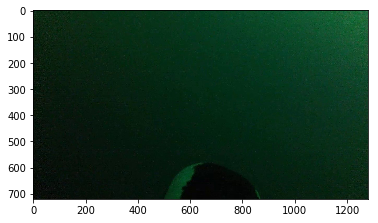

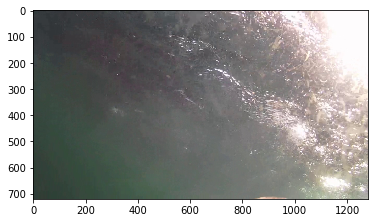

20160819_no9_2 train


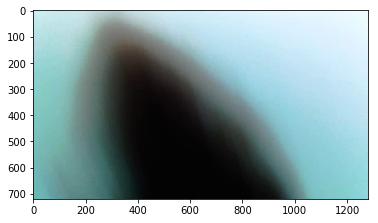

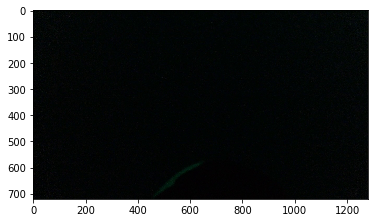

20160930_no8_3 train


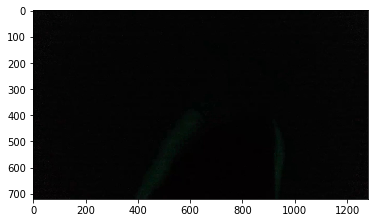

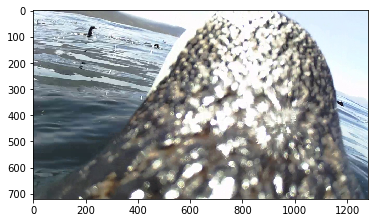

20161005_no9_3 train


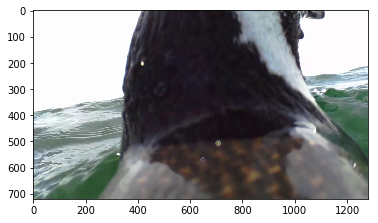

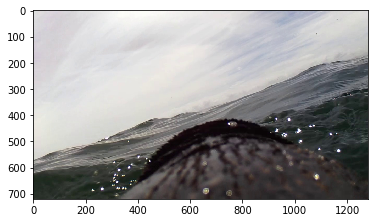

20161005_no9_2 train


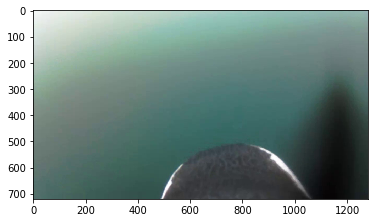

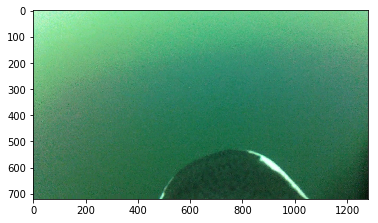

20161005_no9_1 train


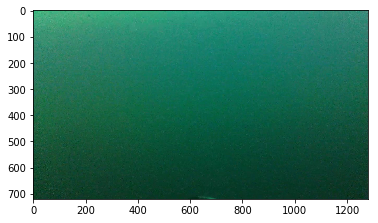

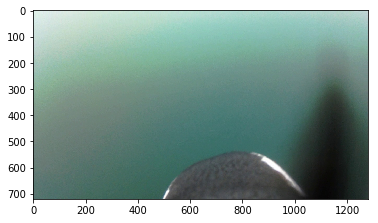

20161005_no9_4 train


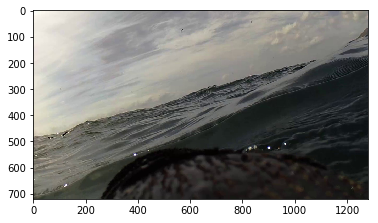

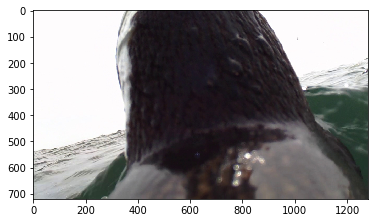

20150827_no8B_3 train


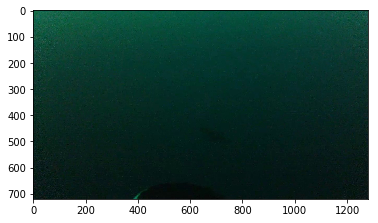

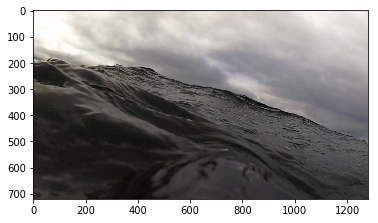

20150827_no8B_1 train


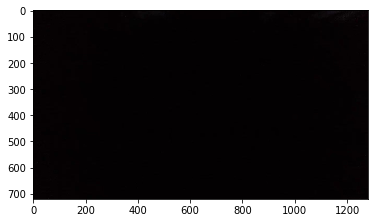

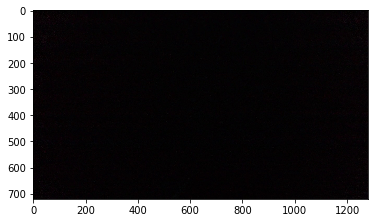

20160801_no9_1 train


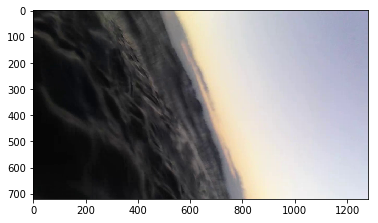

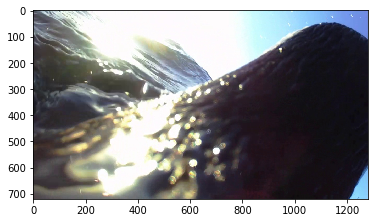

20150820_no8B_3 train


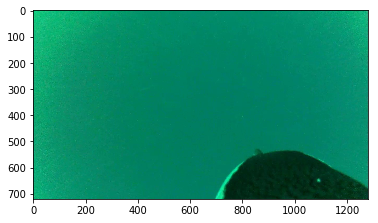

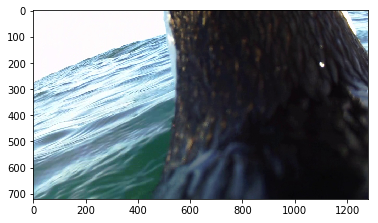

20150820_no9W_3 train


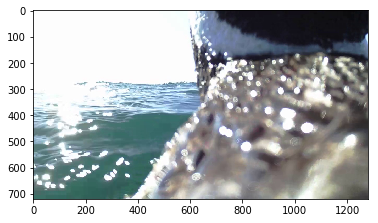

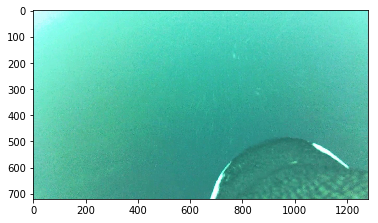

20150820_no8B_2 train


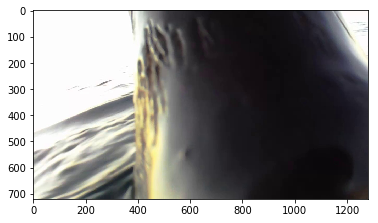

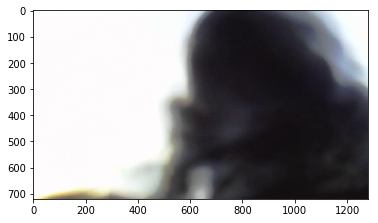

20160802_no8_1 train


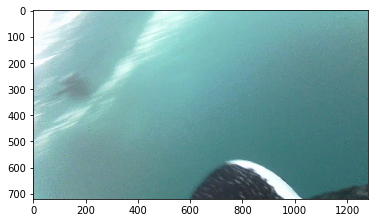

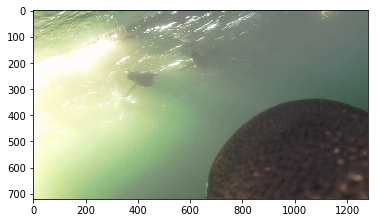

20160802_no8_3 train


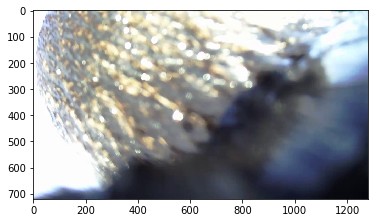

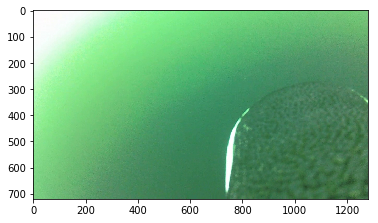

20160812_no9_2 train


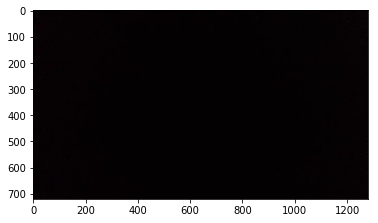

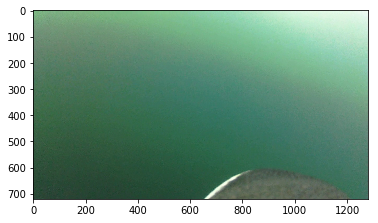

20160801_no9_2 train


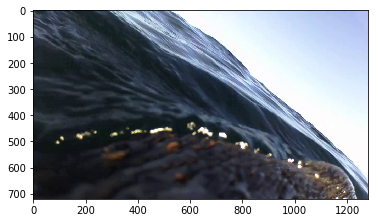

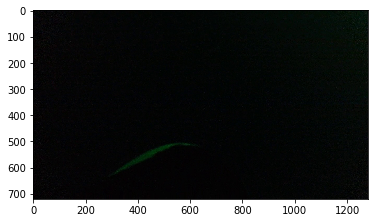

20160812_no9_1 valid


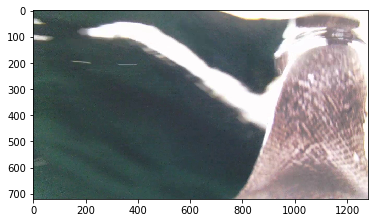

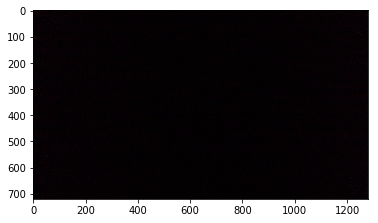

20160930_no8_4 valid


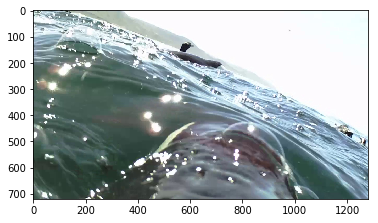

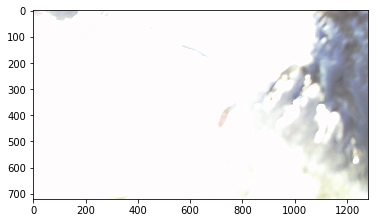

In [25]:
for vid in list(labels.sort_values('split')['video'].unique()):
    print(vid, list(labels[labels['video'] == vid].head(1)['split'])[0])
    view_video_sample(vid)